In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier




In [35]:
#kaggle datasets for heart disease
df = pd.read_csv("sample_data/heart.csv")
df.head()



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [36]:

# print(f"feature_names: {df.columns}")

#one hot encoding transfer the data from n output to n binary variables.
#pandas has built in feature for this pd.get_dummies

categorical_variables = ['Sex', 'ChestPainType', 'RestingECG','ExerciseAngina','ST_Slope']
df = pd.get_dummies(data=df, drop_first=False, prefix=categorical_variables, columns=categorical_variables, dtype=int)

df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [37]:
#extract all the features from the given data

features = [x for x in df.columns if x not in 'HeartDisease']
# print(features)

In [44]:

# split the data
X_train, X_, y_train, y_ = train_test_split(df[features], df['HeartDisease'], test_size=0.4, random_state =42)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, X_val.shape)

(550, 20) (550,)
(74, 20) (294, 20)


0.9890909090909091 0.8401360544217688 1


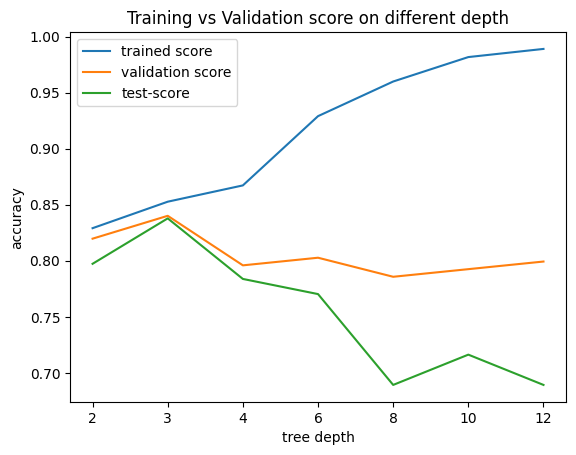

In [45]:
#build the decision tree with different max depth
max_depth_list =[2, 3, 4, 6, 8, 10, 12]
accuracy_score_train=[]
accuracy_score_val=[]
test_acc=[]

for depth in max_depth_list:
  model = DecisionTreeClassifier(max_depth= depth, random_state=42).fit(X_train, y_train)
  pred_train = model.predict(X_train) #predicted values fro training data
  pred_val = model.predict(X_val) # prediction on cross validation data
  accuracy_train = accuracy_score(y_train, pred_train)
  accuracy_val = accuracy_score(y_val, pred_val)
  accuracy_score_train.append(accuracy_train)
  accuracy_score_val.append(accuracy_val)
  pred_test = model.predict(X_test)
  test_score = accuracy_score(pred_test, y_test)
  test_acc.append(test_score)


print(max(accuracy_score_train), max(accuracy_score_val),np.argmax(accuracy_score_val))

plt.title("Training vs Validation score on different depth")
plt.xlabel("tree depth")
plt.ylabel("accuracy")
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.plot(accuracy_score_train, label="trained score")
plt.plot(accuracy_score_val, label="validation score")
plt.plot(test_acc, label="test-score")
plt.legend()
plt.show()


#from the figure below its clear that as the depth reaches to 3, validation_score has
#highest score but as the depth increase model becomes complex and overfitted as depth >= 4
# so the best possible values for depth should be 3 which also shows best for test results.




1.0 0.8843537414965986 5 0.8741496598639455


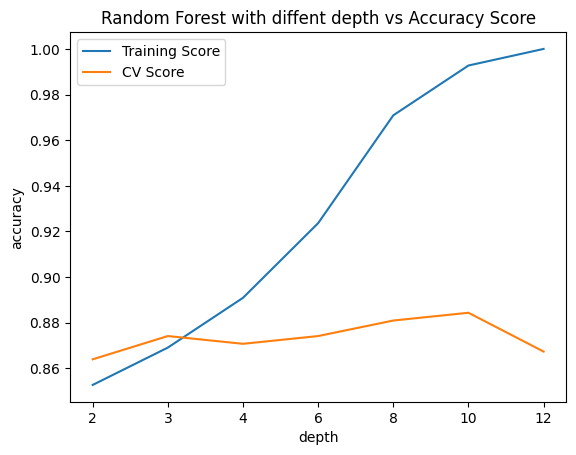

In [46]:
#now apply the same data for random forest algorithm
rf_acc_score_train=[]
rf_acc_score_cv=[]

for depth in max_depth_list:
  model = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
  model.fit(X_train, y_train)
  pred_train=model.predict(X_train)
  accuracy_score_train = accuracy_score(y_train, pred_train)
  rf_acc_score_train.append(accuracy_score_train)
  pred_val = model.predict(X_val)
  accuracy_score_cv = accuracy_score(y_val, pred_val)
  rf_acc_score_cv.append(accuracy_score_cv)
  pred_test = model.predict(X_test)


print(max(rf_acc_score_train), max(rf_acc_score_cv), np.argmax(rf_acc_score_cv), rf_acc_score_cv[1])

plt.title("Random Forest with diffent depth vs Accuracy Score")
plt.xlabel("depth")
plt.ylabel("accuracy")
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.plot(rf_acc_score_train, label="Training Score")
plt.plot(rf_acc_score_cv, label="CV Score")
plt.legend()
plt.show()


#from fig: it is clear that as both training score and cv score low below depth 3 meaning the model underfits from 2-3
#as the depth increase model started to improve accuracy score and gives optimal solution at depth 10 and overfits at depth 12.

0.9927272727272727 0.8843537414965986 0


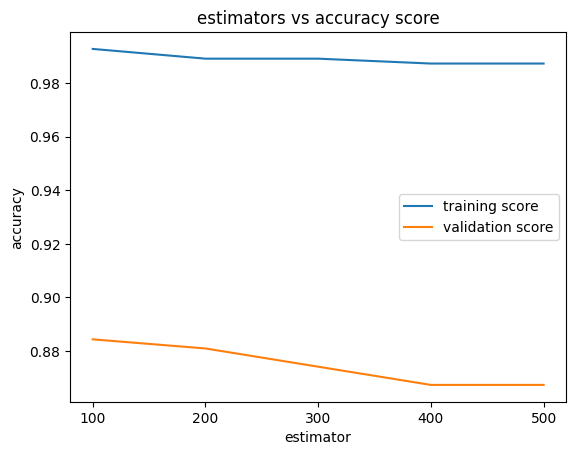

In [47]:
#now lets build random forest with different n_estimators having depth 10
n_estimators_list=[100, 200, 300, 400, 500]
rf_nestimators_train_score=[]
rf_nestimators_val_score=[]

for estmator in n_estimators_list:
  model = RandomForestClassifier(n_estimators=estmator, max_depth=10, random_state=42)
  model.fit(X_train, y_train)
  pred_ytrain = model.predict(X_train)
  score_train = accuracy_score(pred_ytrain, y_train)
  rf_nestimators_train_score.append(score_train)
  pred_yval = model.predict(X_val)
  score_val = accuracy_score(y_val, pred_yval)
  rf_nestimators_val_score.append(score_val)

print(max(rf_nestimators_train_score), max(rf_nestimators_val_score), np.argmax(rf_nestimators_val_score))

plt.title("estimators vs accuracy score")
plt.xlabel("estimator")
plt.ylabel("accuracy")
plt.xticks(ticks=range(len(n_estimators_list)), labels=n_estimators_list)
plt.plot(rf_nestimators_train_score, label="training score")
plt.plot(rf_nestimators_val_score, label="validation score")
plt.legend()
plt.show()


# The model gives best validation score at 100 but as n_estimator increase from 100,
#the validation score decreases slightly while training scores decreases slightly and remains stable. this results adding more trees doesn't give the better result.

In [48]:
# XGgradient boosting

xgmodel = XGBClassifier(n_estimators=100, learning_rate=0.1,eval_metric="logloss", verbosity=1,early_stopping_rounds=10, random_state=42)
xgmodel.fit(X_train, y_train, eval_set=[(X_val, y_val)])


[0]	validation_0-logloss:0.63428
[1]	validation_0-logloss:0.59311
[2]	validation_0-logloss:0.56281
[3]	validation_0-logloss:0.53476
[4]	validation_0-logloss:0.51319
[5]	validation_0-logloss:0.49235
[6]	validation_0-logloss:0.47542
[7]	validation_0-logloss:0.46015
[8]	validation_0-logloss:0.44261
[9]	validation_0-logloss:0.43075
[10]	validation_0-logloss:0.41729
[11]	validation_0-logloss:0.40704
[12]	validation_0-logloss:0.39929
[13]	validation_0-logloss:0.39063
[14]	validation_0-logloss:0.38447
[15]	validation_0-logloss:0.37735
[16]	validation_0-logloss:0.37242
[17]	validation_0-logloss:0.36558
[18]	validation_0-logloss:0.36056
[19]	validation_0-logloss:0.35697
[20]	validation_0-logloss:0.35394
[21]	validation_0-logloss:0.35066
[22]	validation_0-logloss:0.34872
[23]	validation_0-logloss:0.34793
[24]	validation_0-logloss:0.34536
[25]	validation_0-logloss:0.34320
[26]	validation_0-logloss:0.34268
[27]	validation_0-logloss:0.34036
[28]	validation_0-logloss:0.33950
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [49]:
xgmodel.best_iteration
xgpred_ytrain=xgmodel.predict(X_train)
xgpred_yval=xgmodel.predict(X_val)
accuracy_valscore=accuracy_score(xgpred_yval, y_val)
accuracy_trainscore = accuracy_score(xgpred_ytrain, y_train)
print(f"training accuracy: {accuracy_trainscore} and validation score: {accuracy_valscore}")

training accuracy: 0.9727272727272728 and validation score: 0.8469387755102041
